<a href="https://colab.research.google.com/github/alessiapapalini/MLPNS2021/blob/main/HM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
from scipy.optimize import curve_fit, minimize
    
%pylab inline
# this package sets up pretty plots
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
distributions = ['chis']

In [ ]:
distributions = ['gauss'] #gaussiana 

In [ ]:
distributions = ['pois']

In [ ]:
distributions = ['binomial']

In [ ]:
distributions = ['cauchy']

In [ ]:
mymean = 100

In [ ]:
df = mymean

In [ ]:
df1=mymean

In [ ]:
df2=mymean

In [ ]:
df3=mymean

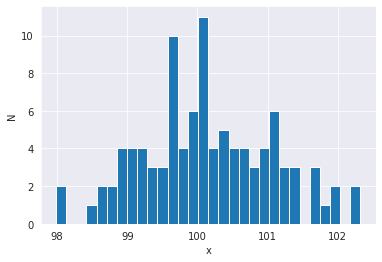

In [ ]:
import numpy as np #gaussiana
np.random.seed(456) #per riprodurre sempre lo stesso valore
md2 = {}
md2['gauss'] = np.random.normal(df, size=100)
pl.hist(md2['gauss'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


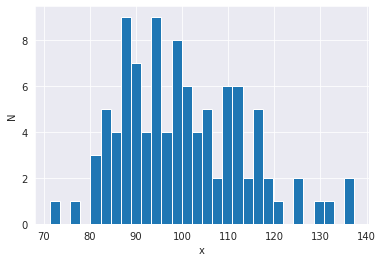

In [ ]:
import numpy as np #chisquare
np.random.seed(456) #per riprodurre sempre lo stesso valore
md = {}
md['chis'] = np.random.chisquare(df, size=100)
pl.hist(md['chis'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


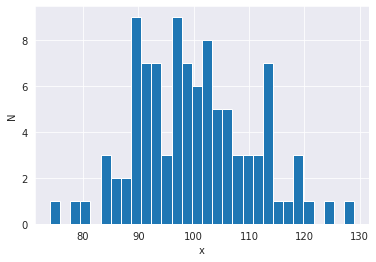

In [ ]:
import numpy as np #poissoniana
np.random.seed(456) #per riprodurre sempre lo stesso valore
md1={}
md1['pois'] = np.random.poisson(df1, size=100)
pl.hist(md1['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

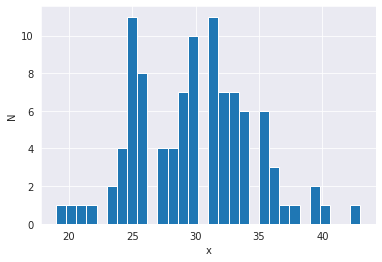

In [ ]:
import numpy as np #binomiale
np.random.seed(456) #per riprodurre sempre lo stesso valore
md3= {}
md3['binomial'] = np.random.binomial(df3, p=0.3, size=100)
pl.hist(md3['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


In [ ]:
 a=np.random.chisquare(df, size=100)
 mean(a)

98.75933923014588

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chis'].mean(), md['chis'].std()))

Chisq mean: 100.09, standard deviation: 13.24


In [ ]:
print ("possion mean: %.2f, standard deviation: %.2f"%(md1['pois'].mean(), md1['pois'].std()))

possion mean: 99.90, standard deviation: 10.46


In [ ]:
print ("gaussian mean: %.2f, standard deviation: %.2f"%(md2['gauss'].mean(), md2['gauss'].std()))

gaussian mean: 100.14, standard deviation: 0.92


In [ ]:
print ("binomial mean: %.2f, standard deviation: %.2f"%(md3['binomial'].mean(), md3['binomial'].std()))

binomial mean: 29.84, standard deviation: 4.55


In [ ]:
mysize1 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize1.shape)

shape of the 'size' list that contains the size of each distribution (99,)


In [ ]:
mysize1

array([2000, 1000,  666,  500,  400,  333,  285,  250,  222,  200,  181,
        166,  153,  142,  133,  125,  117,  111,  105,  100,   95,   90,
         86,   83,   80,   76,   74,   71,   68,   66,   64,   62,   60,
         58,   57,   55,   54,   52,   51,   50,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   40,   39,   38,   37,   37,   36,
         35,   35,   34,   33,   33,   32,   32,   31,   31,   30,   30,
         29,   29,   28,   28,   28,   27,   27,   27,   26,   26,   25,
         25,   25,   25,   24,   24,   24,   23,   23,   23,   22,   22,
         22,   22,   21,   21,   21,   21,   21,   20,   20,   20,   20])

Text(0, 0.5, 'size of the array')

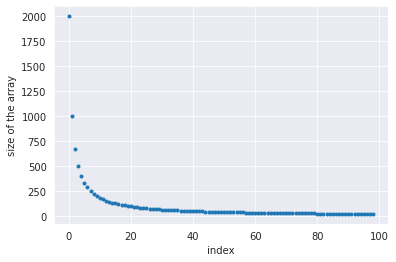

In [ ]:
pl.plot(mysize1, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

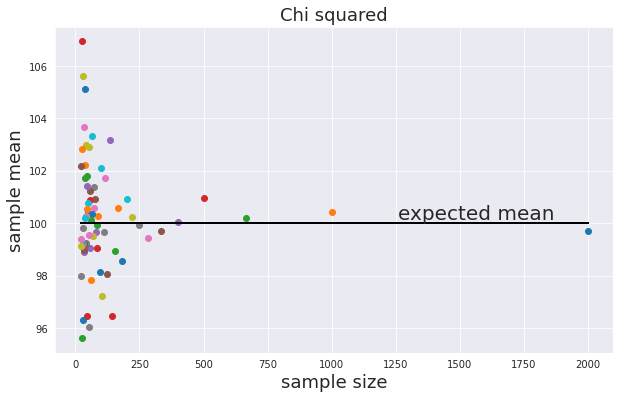

In [ ]:
md['chisq'] = {} #chisquare 
 
#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md['chisq']:
    if not type(m) == str:
        md['chisq']['means'][m] = md['chisq'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md['chisq']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

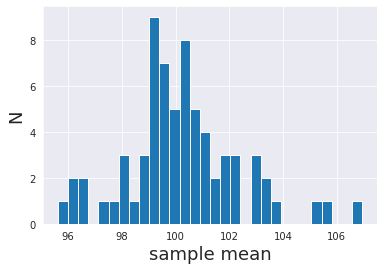

In [ ]:
allmeans = list(md['chisq']['means'].values())

#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Text(1259.3999999999999, 100, 'expected mean')

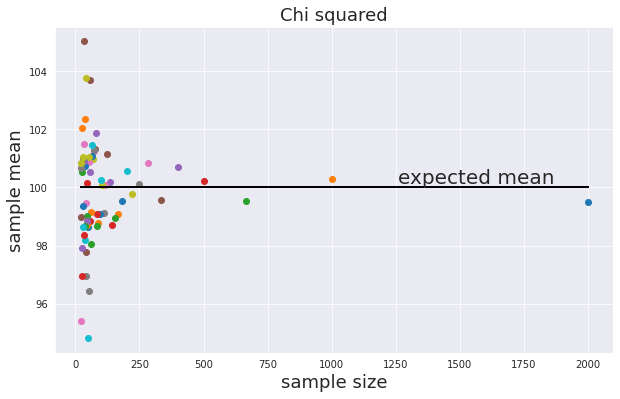

In [ ]:
md1['pois'] = {}  #poisson

#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md1['pois'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md1['pois']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md1['pois']:
    if not type(m) == str:
        md1['pois']['means'][m] = md1['pois'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md1['pois']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

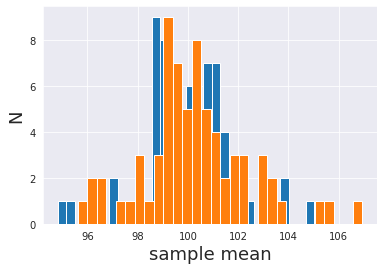

In [ ]:
allmeans = list(md1['pois']['means'].values()) #poison e chisq a confronto 

#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

allmeans = list(md['chisq']['means'].values())
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Text(1259.3999999999999, 100, 'expected mean')

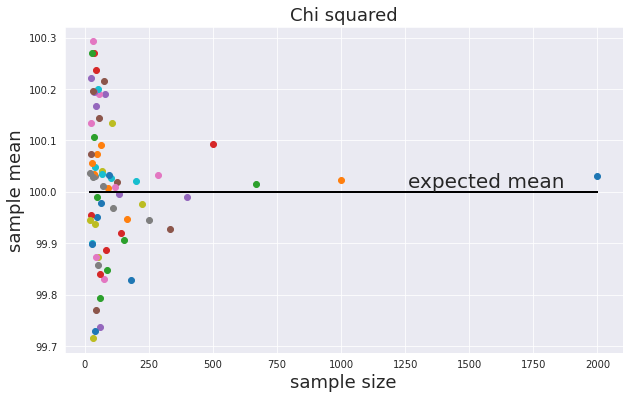

In [ ]:
md2['gauss'] = {}  #gaussiana

#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md2['gauss'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md2['gauss']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md2['gauss']:
    if not type(m) == str:
        md2['gauss']['means'][m] = md2['gauss'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md2['gauss']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

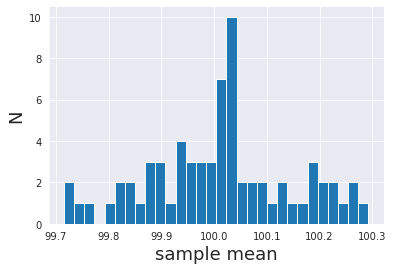

In [ ]:
allmeans = list(md2['gauss']['means'].values()) #gaussiana 
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Text(0, 0.5, 'N')

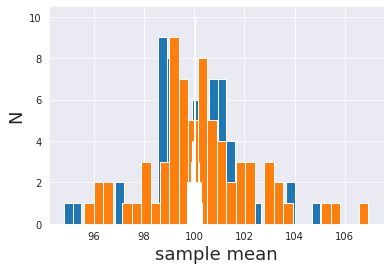

In [ ]:
allmeans = list(md1['pois']['means'].values()) #poison e chisq  e gauss a confronto 

#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

allmeans = list(md['chisq']['means'].values())
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

allmeans = list(md2['gauss']['means'].values())
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Text(1259.3999999999999, 100, 'expected mean')

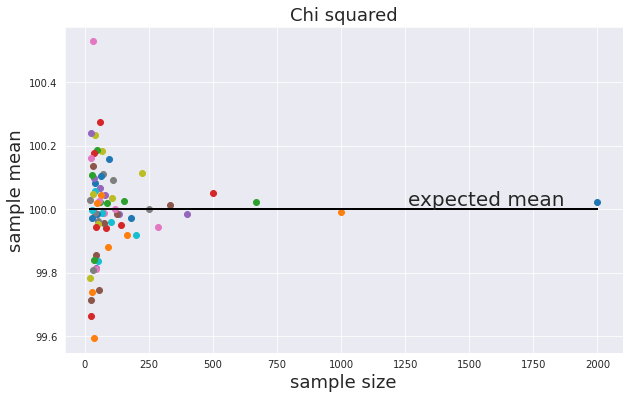

In [ ]:
md2['gauss'] = {}  #gaussiana

#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md2['gauss'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md2['gauss']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md2['gauss']:
    if not type(m) == str:
        md2['gauss']['means'][m] = md2['gauss'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md2['gauss']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(1259.3999999999999, 100, 'expected mean')

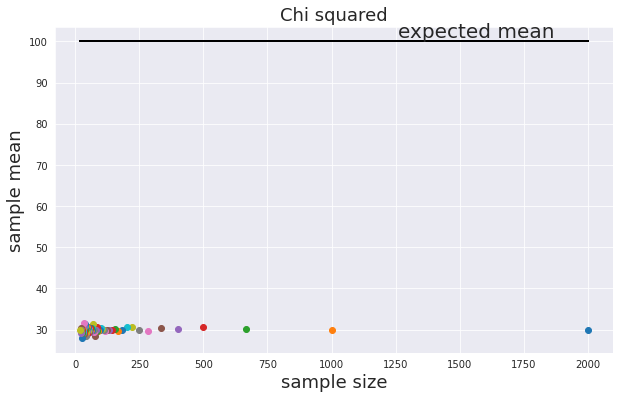

In [ ]:
md3['binomial'] = {}  #gaussiana

#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md3['binomial'][n] = np.random.binomial(df, p=0.3, size = n)
    
# save the means for plotting later    

md3['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md3['binomial']:
    if not type(m) == str:
        md3['binomial']['means'][m] = md3['binomial'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md3['binomial']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

In [ ]:
np.random.standard_cauchy?

In [ ]:
import numpy as np
import pylab as plt


In [ ]:
   x= np.array(range(-20,20))

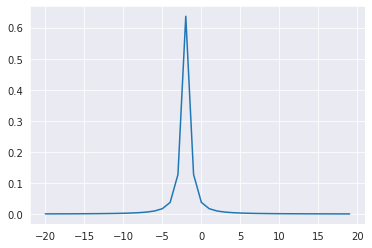

In [ ]:
def cauchy(x, mu, gamma):
    return 1./(np.pi*gamma*(1.+((x-mu)/gamma)**2))

mu=-2
gamma=0.5 

cauchy(x,mu,gamma)
plt.plot (x, cauchy(x,mu, gamma))

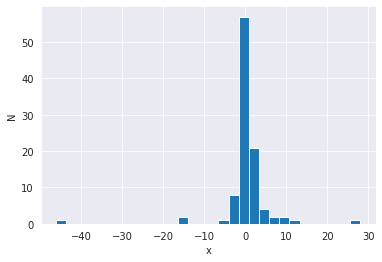

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(456) #per riprodurre sempre lo stesso valore
md5={}
md5['cauchy'] = np.random.standard_cauchy(100)
pl.hist(md5['cauchy'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


In [ ]:
md5['cauchy'] = {}  #cauchy

#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md5['cauchy'][n] = np.random.standard_cauchy(100)
    
# save the means for plotting later    

md5['cauchy']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md5['cauchy']:
    if not type(m) == str:
        md5['cauchy']['means'][m] = md5['cauchy'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md5['cauchy']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

In [ ]:
allmeans = list(md5['cauchy']['means'].values())

#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [ ]:
def mygauss(x,mu, sig):
  return  1/np.sqrt(2*np.pi)/sig * (np.exp(-(x-mu)**2/2/sig**2))
x=np.arange(200)
mu=100
sig=10
#mygauss(x,mu,sig) #array of floating number

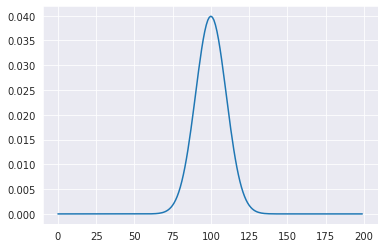

In [ ]:
plt.plot (x, mygauss(x,mu, sig))

